# <font color=red> Starting a standalone cluster manually</font>

- <font color=violet>Go to the spark installation folder and getinto sbin folder </font>

!cd /home/tulasiram/spark/sbin

- <font color=red>Starting the master node</font>

./start-mater.sh

- <font color=yellow>Starting the worker node</font>

./start-worker.sh spark://tulasiram-Inspiron-14-5420:7077

In [4]:
# Finally, the following configuration options can be passed to the master and worker

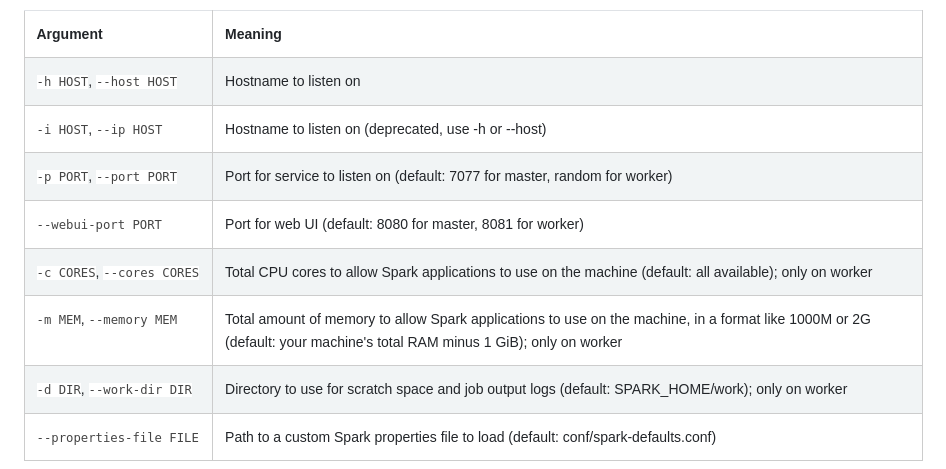

In [2]:
from PIL import Image
from IPython.display import display

# Replace 'image_path' with the actual path to your image file
image_path = "../database/cluster-01.png"
image = Image.open(image_path)
display(image)

- <font color=red>Script files to manage Clusters </font>

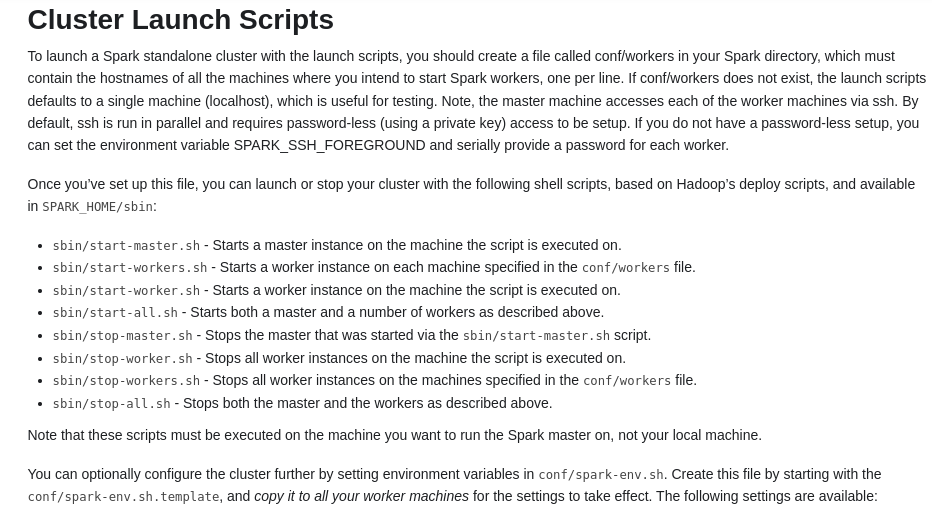

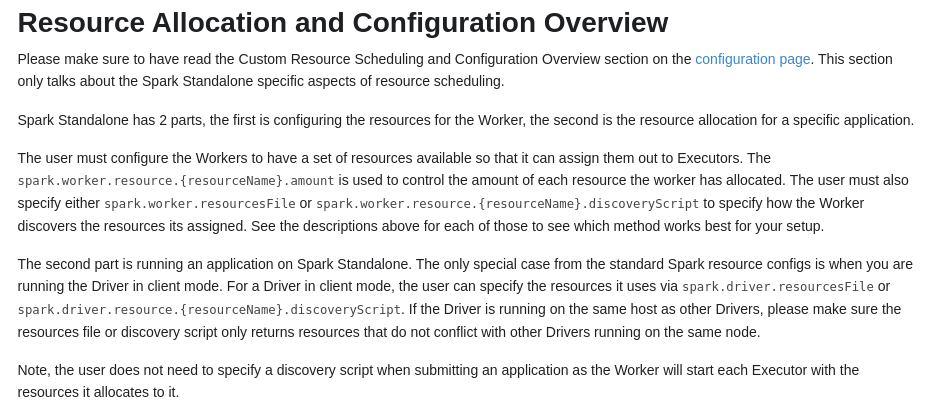

In [3]:
from PIL import Image
from IPython.display import display

# Replace 'image_path' with the actual path to your image file
image_path = "../database/cluster-02.png"
image_path1 = "../database/cluster-03.png"
image = Image.open(image_path)
image1 = Image.open(image_path1)
display(image)
display(image1)

- <font color=red>Connecting an Application to the Cluster</font>

!./bin/spark-shell --master spark://IP:PORT

eg : spark-shell --master spark://tulasiram-Inspiron-14-5420:7077

- <font color=red>Launching Spark Applications</font>

- <font color=yellow>The spark-submit script provides the most straightforward way to submit a compiled Spark application to the cluster. For standalone clusters, Spark currently supports two deploy modes. In client mode, the driver is launched in the same process as the client that submits the application. In cluster mode, however, the driver is launched from one of the Worker processes inside the cluster, and the client process exits as soon as it fulfills its responsibility of submitting the application without waiting for the application to finish.</font>

- <font color=yellow>If your application is launched through Spark submit, then the application jar is automatically distributed to all worker nodes. For any additional jars that your application depends on, you should specify them through the --jars flag using comma as a delimiter (e.g. --jars jar1,jar2). To control the application’s configuration or execution environment, see Spark Configuration.</fomt>

- <font color=yellow>Additionally, standalone cluster mode supports restarting your application automatically if it exited with non-zero exit code. To use this feature, you may pass in the --supervise flag to spark-submit when launching your application. Then, if you wish to kill an application that is failing repeatedly, you may do so through</font>

./bin/spark-class org.apache.spark.deploy.Client kill --master_url --driver_ID

eg: ./bin/spark-class org.apache.spark.deploy.Client kill spark://tulasiram-Inspiron-14-5420:7077  app-20230805171906-0000

In [6]:
from pyspark.sql import SparkSession

# Create a new SparkSession
def create_spark_session(app_name,  config_options=None):
    spark = SparkSession.builder.master("spark://tulasiram-Inspiron-14-5420:7077").appName(app_name)
    
    if config_options:
        for key, value in config_options.items():
            spark = spark.config(key, value)
    
    return spark.getOrCreate()

# Example usage:
config_options = {
    "spark.some.config.option": "some-value",
    "spark.executor.memory": "10g",
    "spark.driver.memory": "2g"
}

spark = create_spark_session(app_name="My Spark Standaloe cluster", config_options=config_options)

# Verify that the SparkSession is created successfully
print(spark.version)


3.4.1


23/08/05 17:30:47 ERROR TaskSchedulerImpl: Lost executor 0 on 192.168.1.7: Command exited with code 143
23/08/05 17:43:56 ERROR TaskSchedulerImpl: Lost executor 3 on 192.168.1.7: Worker shutting down
23/08/05 17:47:16 ERROR TaskSchedulerImpl: Lost executor 6 on 192.168.1.7: Command exited with code 143
23/08/05 18:07:00 ERROR TaskSchedulerImpl: Lost executor 9 on 192.168.1.7: Worker shutting down
23/08/05 18:07:12 WARN StandaloneAppClient$ClientEndpoint: Connection to tulasiram-Inspiron-14-5420:7077 failed; waiting for master to reconnect...
23/08/05 18:07:12 WARN StandaloneSchedulerBackend: Disconnected from Spark cluster! Waiting for reconnection...
23/08/05 18:07:12 WARN StandaloneAppClient$ClientEndpoint: Connection to tulasiram-Inspiron-14-5420:7077 failed; waiting for master to reconnect...


<font color=red>Launching Applications with spark-submit</font>

In [ ]:
# Run a Python application on a Spark standalone cluster
./bin/spark-submit \
  --master spark://207.184.161.138:7077 \
  examples/src/main/python/pi.py \
  1000

In [ ]:
# Run application locally on 8 cores
./bin/spark-submit \
  --class org.apache.spark.examples.SparkPi \
  --master local[8] \
  /path/to/examples.jar \
  100

# Run on a Spark standalone cluster in client deploy mode
./bin/spark-submit \
  --class org.apache.spark.examples.SparkPi \
  --master spark://207.184.161.138:7077 \
  --executor-memory 20G \
  --total-executor-cores 100 \
  /path/to/examples.jar \
  1000

# Run on a Spark standalone cluster in cluster deploy mode with supervise
./bin/spark-submit \
  --class org.apache.spark.examples.SparkPi \
  --master spark://207.184.161.138:7077 \
  --deploy-mode cluster \
  --supervise \
  --executor-memory 20G \
  --total-executor-cores 100 \
  /path/to/examples.jar \
  1000

# Run on a YARN cluster in cluster deploy mode
export HADOOP_CONF_DIR=XXX
./bin/spark-submit \
  --class org.apache.spark.examples.SparkPi \
  --master yarn \
  --deploy-mode cluster \
  --executor-memory 20G \
  --num-executors 50 \
  /path/to/examples.jar \
  1000


# Run on a Mesos cluster in cluster deploy mode with supervise
./bin/spark-submit \
  --class org.apache.spark.examples.SparkPi \
  --master mesos://207.184.161.138:7077 \
  --deploy-mode cluster \
  --supervise \
  --executor-memory 20G \
  --total-executor-cores 100 \
  http://path/to/examples.jar \
  1000

# Run on a Kubernetes cluster in cluster deploy mode
./bin/spark-submit \
  --class org.apache.spark.examples.SparkPi \
  --master k8s://xx.yy.zz.ww:443 \
  --deploy-mode cluster \
  --executor-memory 20G \
  --num-executors 50 \
  http://path/to/examples.jar \
  1000
